In [13]:
import os 
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [14]:
%matplotlib inline


In [15]:
with open("package-lock.json") as f:
        packageLockFile = json.load(f)

In [16]:
dependencies = packageLockFile['dependencies']

In [39]:
def makeGraph(queue, graph):
    if (len(queue)) == 0:
        return
    n = queue.popleft()
    node = n+'@'+dependencies[n]['version']
    graph.add_node(node)

    if dependencies[n].get('requires'):
        
        for i in dependencies[n]["requires"]:
#             graph.add_edges_from([(node,i+'@'+dependencies[n]["requires"][i])])
            graph.add_edges_from([(node,i+'@'+dependencies[i]["version"])])
            queue.append(i)
    makeGraph(queue, graph)

In [40]:
G = nx.DiGraph()
q = deque([list(dependencies.keys())[0]])
makeGraph(q, G)


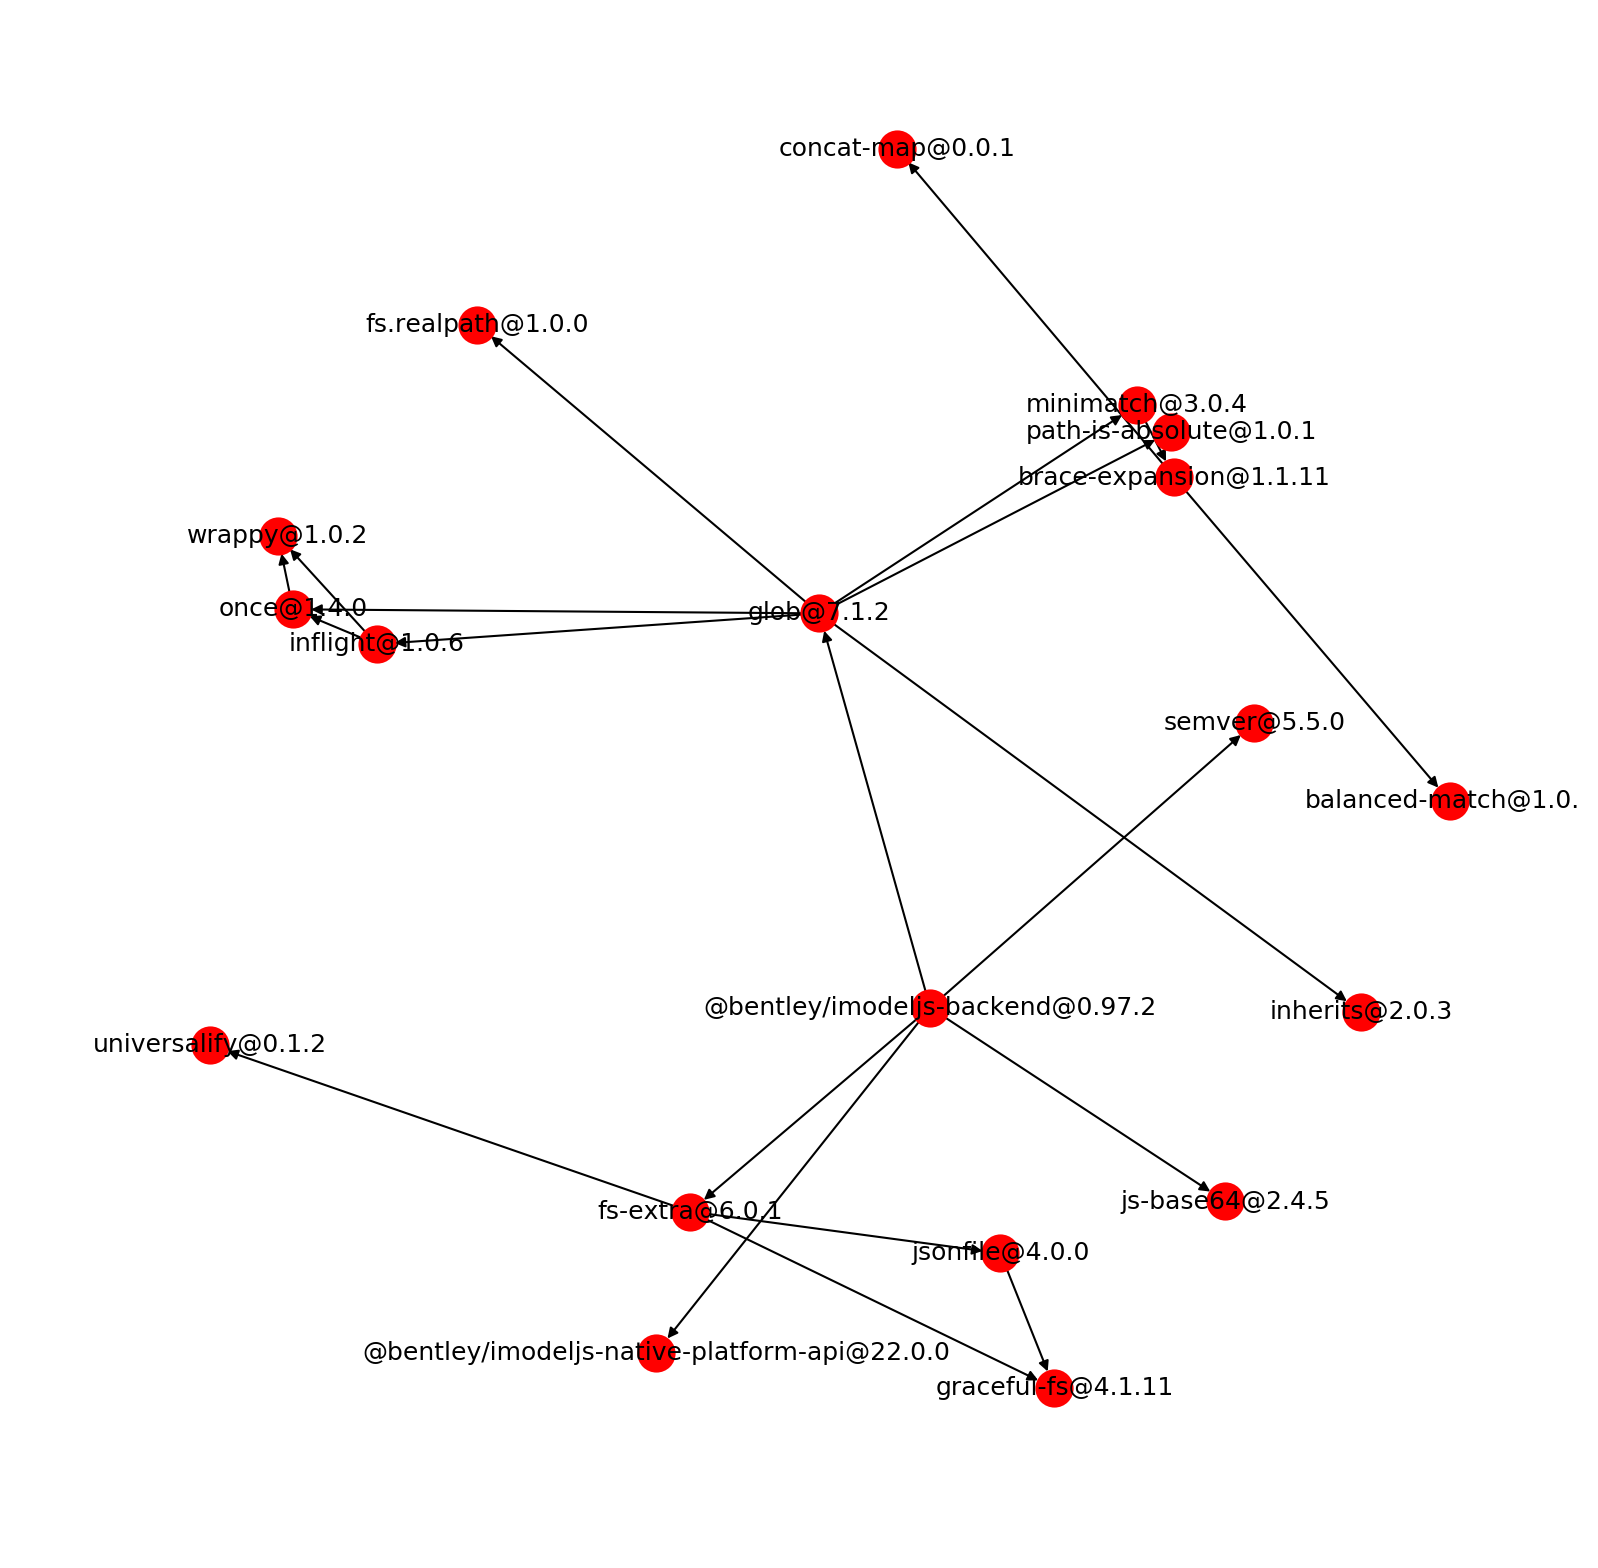

In [41]:
plt.figure(num=None, figsize=(10, 10), dpi=150, facecolor='w', edgecolor='k')
nx.draw_spring(G, with_labels=True)
plt.savefig('dependency_graph1.png')